In [24]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)

#Obligatory exercise 10:- Linear reservor model.

#Values:
#W=1 U/hour for t<=5 hours; T*=1 hour
#Hint: Not a bad idea to make a function computing
#the analytical solution to the linear reservoir model.

#b) Plot the first 20 hours with a half hour resolution.
#Is 20 hours enough to describe the entire event?

#Pre-allocate vectors containg the solution and forcing.

dt=0.5      #Timestep, hours.
T=20        #Hours to solve for.
nn= int((T/dt)+1) #Number of points in the solution.
t = np.linspace(0,T,nn) #Time vector (hours)
w = 1.0 #unit/hour.
Ts = 1.0 #1 hour, response time.
q = np.zeros(nn) #Event flow, initially a vector of zeros.
tpk = 5 #After 5 hours the precipitation stops, this is the peak time.

for i in range(0,nn):
    if t[i] <= tpk:
        q[i] = w*(1.0-np.exp(-t[i]/Ts))
        if t[i] == tpk:
            qpk = q[i]
    else:
        q[i] = qpk*np.exp(-(t[i]-tpk)/Ts)

In [25]:
#c) Do the same for T*=2 hours

Ts2 = 2
q2 = np.zeros(len(q))

#See Box 9-2 for the analytical solutions.
#Looping here with an if statement is easiest.

for i in range(0,nn):
    if t[i] <= tpk:
        q2[i] = w*(1.0-np.exp(-t[i]/Ts2))
        if t[i] == tpk:
            qpk = q2[i]
    else:
        q2[i] = qpk*np.exp(-(t[i]-tpk)/Ts2)

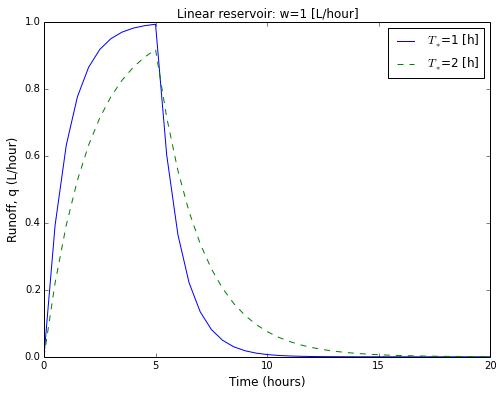

In [26]:
#Plot the solutions
plt.figure(1)
plt.plot(t,q,label='$T_{*}$=1 [h]')
plt.plot(t,q2,'--',label='$T_{*}$=2 [h]')
plt.xlabel('Time (hours)',fontsize=12)
plt.ylabel('Runoff, q (L/hour)',fontsize=12)
plt.title('Linear reservoir: w=1 [L/hour]',fontsize=12)
plt.legend()
plt.show()

In [27]:
#d) Try different values of W, using the two T* values for each W.
wd=2*w; wh=0.5*w #e.g. double and half, same period of precipitation. 

#Double and half input arrays as nx2, second dimension is for varying T*.

qh = np.zeros((len(q),2)); qd = np.zeros((len(q),2))
Ts1 = Ts

#See Box 9-2 for the analytical solutions.

for i in range(0,nn):
    if(t[i]<=tpk):
        qd[i,0] = wd*(1.0-np.exp(-t[i]/Ts1))
        qd[i,1] = wd*(1.0-np.exp(-t[i]/Ts2))
        qh[i,0] = wh*(1.0-np.exp(-t[i]/Ts1))
        qh[i,1] = wh*(1.0-np.exp(-t[i]/Ts2))
        if t[i] == tpk:
            qpkd1 = qd[i,0]
            qpkd2 = qd[i,1]
            qpkh1 = qh[i,0]
            qpkh2 = qh[i,1]
    else:
        qd[i,0] = qpkd1*np.exp(-(t[i]-tpk)/Ts1)
        qd[i,1] = qpkd2*np.exp(-(t[i]-tpk)/Ts2)
        qh[i,0] = qpkh1*np.exp(-(t[i]-tpk)/Ts1)
        qh[i,1] = qpkh2*np.exp(-(t[i]-tpk)/Ts2)

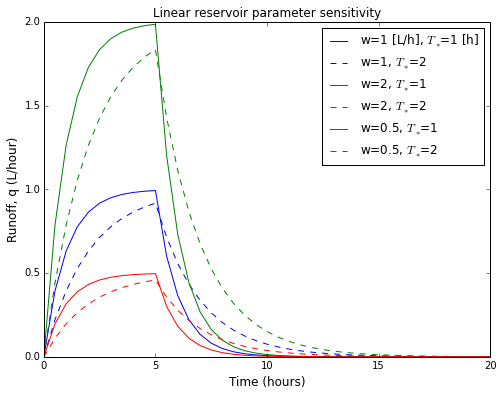

In [28]:
#Plot the results
plt.figure(2)
plt.plot(t,q,label='w=1 [L/h], $T_{*}$=1 [h]')
plt.plot(t,q2,'--b',label='w=1, $T_{*}$=2')
plt.plot(t,qd[:,0],label='w=2, $T_{*}$=1')
plt.plot(t,qd[:,1],'--g',label='w=2, $T_{*}$=2')
plt.plot(t,qh[:,0],label='w=0.5, $T_{*}$=1')
plt.plot(t,qh[:,1],'--r',label='w=0.5, $T_{*}$=2')
plt.legend(loc='upper right')
plt.xlabel('Time (hours)',fontsize=12)
plt.ylabel('Runoff, q (L/hour)',fontsize=12)
plt.title('Linear reservoir parameter sensitivity',fontsize=12)
plt.show()